In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

Warmup questions:
- What does each column of X˜ represent? 1 is w0, 2 is input variable
- What does each row of X˜ represent? samples
- Why do we have 1’s in X˜ ? because it is to compensate for w0
- If we have heights and weights of 3 people, what would be the size of y and X˜ ? What would X˜
32 represent?  y(3,1) X(3,2)
- In helpers.py, we have already provided code to form arrays for y and X˜ . Have a look at the code, and
make sure you understand how they are constructed. ok
- Check if the sizes of the variables make sense (use functions shape).



In [3]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [4]:
y.shape, tx.shape

((10000,), (10000, 2))

$L(w) = e^2/2N$


# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [97]:
def compute_loss(y, tx, w, mae=False):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    N = tx.shape[0]
    if mae:
        e = y - tx @ np.asarray(w)
        loss = np.sum(abs(e)) / (2*N)
    else:

        e = y - tx @ np.asarray(w)
        loss = (e @ e.T) / (2* N)

    return loss
compute_loss(y, tx, np.array([1,2]).T, mae=True)

36.53390292746319

# 2 Grid Search

Fill in the function `grid_search()` below:

In [6]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i in range(w0.shape[0]):
        for j in range(w1.shape[0]):
            losses[i,j] = compute_loss(y, tx, np.array((w0[i], w1[j])))
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=18.793541019523236, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.233 seconds


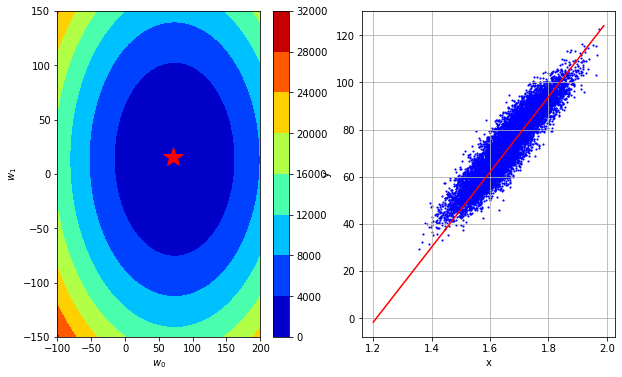

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving


We have issues caused by the granularity of the grid search. 10 * 10 is not a lot.

10 fit: Grid Search: loss*=42.424483146782485, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.011 seconds

50 fit: Grid Search: loss*=18.793541019523236, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.233 seconds

more values make better results, but it's remarkably more expensive.

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [28]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    e = y - tx @ np.asarray(w)
    N = tx.shape[0]
    gradient = - 1/N * tx.T @ e
    return gradient
np.linalg.norm(compute_gradient(y,tx,np.array([50, 100])))
# 100-20: [26.706078    6.52028757] norm 27.490521129292492
# 50-10: [-23.293922    -3.47971243] norm 23.552392678247735

89.60115491762569

The norm gives us the steepness of the curve, the vector is the direction to the minimum


Please fill in the functions `gradient_descent` below:

In [29]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y, tx, w)
        gradient = compute_gradient(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [44]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.236712759168, w0=7.329392200210517, w1=1.3479712434988973
Gradient Descent(1/49): loss=2264.635056030003, w0=13.925845180399985, w1=2.5611453626479044
Gradient Descent(2/49): loss=1837.2777140793808, w0=19.862652862570506, w1=3.653002069882012
Gradient Descent(3/49): loss=1491.1182670993755, w0=25.205779776523972, w1=4.6356731063927095
Gradient Descent(4/49): loss=1210.7291150455724, w0=30.014593999082095, w1=5.520077039252338
Gradient Descent(5/49): loss=983.613901881991, w0=34.34252679938441, w1=6.316040578826005
Gradient Descent(6/49): loss=799.65057921949, w0=38.23766631965648, w1=7.032407764442305
Gradient Descent(7/49): loss=650.6402878628647, w0=41.74329188790135, w1=7.677138231496976
Gradient Descent(8/49): loss=529.9419518639982, w0=44.89835489932173, w1=8.257395651846181
Gradient Descent(9/49): loss=432.1762997049161, w0=47.737911609600076, w1=8.779627330160466
Gradient Descent(10/49): loss=352.9861214560596, w0=50.29351264885059, w1=9.249635

In [45]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [82]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    e = y - tx @ np.asarray(w)
    N = tx.shape[0]
    gradient = - 1/N * tx.T @ e
    return gradient


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        small_y, small_tx = batch_iter(y, tx, batch_size).__next__()
        small_y, small_tx = np.asarray(small_y), np.asarray(small_tx)
        #small_y = np.zeros([0])
        #for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
        #    small_y = np.append(small_y,minibatch_y)
        #    print(minibatch_y)
        #print(small_y)
        loss = compute_loss(small_y, small_tx, w)
        gradient = compute_gradient(small_y, small_tx, w)

        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [83]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 3

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=2998.532875405712, w0=53.60936784366926, w1=5.4914944486397905
Stochastic Gradient Descent(1/49): loss=334.40846570101047, w0=71.37522587273324, w1=20.403939274794816
Stochastic Gradient Descent(2/49): loss=39.283171144274796, w0=75.98551835738243, w1=12.473591236583506
Stochastic Gradient Descent(3/49): loss=12.874519899677622, w0=74.23434154250668, w1=12.504608558129732
Stochastic Gradient Descent(4/49): loss=6.689309089252763, w0=71.84217227182198, w1=11.522548751194591
Stochastic Gradient Descent(5/49): loss=1.9516821545102498, w0=72.56400082355592, w1=12.0438593734885
Stochastic Gradient Descent(6/49): loss=35.22423100303193, w0=73.5436846789599, w1=14.309976108681905
Stochastic Gradient Descent(7/49): loss=4.165338619411883, w0=74.2324694939101, w1=14.676293598160063
Stochastic Gradient Descent(8/49): loss=9.612831297936033, w0=73.8182208158807, w1=15.708646695577283
Stochastic Gradient Descent(9/49): loss=18.11106440263031, w0=70.511081236

In [84]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers

### Exercise 5

In [91]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [92]:
def computeGD():
    from plots import gradient_descent_visualization

    # Define the parameters of the algorithm.
    max_iters = 50
    gamma = 0.1

    # Initialization
    w_initial = np.array([0, 0])

    # Start gradient descent.
    start_time = datetime.datetime.now()
    gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
    end_time = datetime.datetime.now()

    # Print result
    exection_time = (end_time - start_time).total_seconds()
    print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))
    def plot_figure(n_iter):
        fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
        fig.set_size_inches(10.0, 6.0)

    interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))
computeGD()

Gradient Descent(0/49): loss=2869.8351145358533, w0=7.406780585492638, w1=1.1034894865989184
Gradient Descent(1/49): loss=2337.0932814935354, w0=14.072883112436012, w1=2.0966300245379443
Gradient Descent(2/49): loss=1905.572396729258, w0=20.072375386685046, w1=2.990456508683069
Gradient Descent(3/49): loss=1556.0404800701938, w0=25.471918433509178, w1=3.7949003444136777
Gradient Descent(4/49): loss=1272.9196275763516, w0=30.3315071756509, w1=4.518899796571226
Gradient Descent(5/49): loss=1043.5917370563393, w0=34.705137043578446, w1=5.170499303513018
Gradient Descent(6/49): loss=857.8361457351293, w0=38.64140392471324, w1=5.756938859760631
Gradient Descent(7/49): loss=707.3741167649495, w0=42.18404411773455, w1=6.284734460383482
Gradient Descent(8/49): loss=585.4998732991037, w0=45.372420291453736, w1=6.7597505009440475
Gradient Descent(9/49): loss=486.78173609176855, w0=48.241958847801, w1=7.187264937448557
Gradient Descent(10/49): loss=406.82004495382694, w0=50.82454354851354, w1=7.5

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [ ]:
def compute_subgradient(y, tx, w):
    
